**Do the coding here**

So i will be creating the sections so you can add code  and you can perform the visualization

In [186]:
# Alex

In [187]:
import pandas as pd # Import relevant packages
import numpy as np 
import matplotlib.pyplot as plt

In [188]:
paper_counts = pd.read_csv('Group 6/paper_counts.csv') # Read in datasets
authors = pd.read_csv('Group 6/authors.schistosomiasis.csv')
articles = pd.read_csv('Group 6/articles.schistosomiasis.csv')

In [189]:
authors_articles = articles.merge(authors, on = ['PMID'], how = 'outer') # Merge the authors and articles datasets to create a comprehensive list of every article and author in this particular field
authors_articles = authors_articles.set_index(['PMID', ]) # Set PMID as the index
authors_articles['AuthorInitialsLastname'] = authors_articles['AuthorInitials'] + ' ' + authors_articles['AuthorLastname'] # Create a new column with initials, first and last name to count the number of times each author appears
authors_articles.to_csv('author_articles.csv') # Save the dataframe to csv for ease of viewing
authors_articles # Display the dataframe 

,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,AuthorInitialsLastname
PMID,,,,,,,,,,,,,,,,
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",1.0,M,Divizia,M,"Department of Public Health, University of Tor...",M Divizia
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",2.0,R,Gabrieli,R,NaN,R Gabrieli
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",3.0,M L,Stefanoni,ML,NaN,ML Stefanoni
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",4.0,E,Renganathan,E,NaN,E Renganathan
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",5.0,E,El Ghazzawi,E,NaN,E El Ghazzawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",3.0,Bianca Manuela M,Baldonado,BMM,"Department of Biological Sciences, College of ...",BMM Baldonado
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",4.0,Rica Nikki B,Bilasano,RNB,"Department of Biological Sciences, College of ...",RNB Bilasano
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",5.0,Sophia Miel L,Dullano,SML,"Department of Biological Sciences, College of ...",SML Dullano


In [190]:
author_count = authors_articles['AuthorInitialsLastname'].value_counts() # Count the number of times each unique author appears in the authors_articles dataframe and store these counts as a dataframe
author_count = author_count.reset_index() # Reset the index
author_count # Display the dataframe 

,AuthorInitialsLastname,count
0,XN Zhou,215
1,J Utzinger,195
2,DP McManus,164
3,J Xu,156
4,Y Zhang,152
...,...,...
25789,DR Kong,1
25790,LH van Rooyen,1
25791,M Lewis,1
25792,H Karasuyama,1


In [191]:
mask = authors_articles['Year'] <= 2018 # Create a mask that includes all the values I don't want in the dataframe (i.e any rows representing papers published before 2019)
authors_articles_five_years = authors_articles[~mask] # Exclude the mask from the dataframe 
authors_articles_five_years # Display the dataframe

,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,AuthorInitialsLastname
PMID,,,,,,,,,,,,,,,,
28799498,Structure-based Approaches Targeting Parasite ...,Cysteine proteases are essential hydrolytic en...,1875-533X,Current medicinal chemistry,(26) 4435-4453,2019,Rafael Pinto,Vieira,RP,"Departamento de Bioquimica e Imunologia, Insti...",1.0,Rafael Pinto,Vieira,RP,"Departamento de Bioquimica e Imunologia, Insti...",RP Vieira
28799498,Structure-based Approaches Targeting Parasite ...,Cysteine proteases are essential hydrolytic en...,1875-533X,Current medicinal chemistry,(26) 4435-4453,2019,Rafael Pinto,Vieira,RP,"Departamento de Bioquimica e Imunologia, Insti...",2.0,Viviane Corrêa,Santos,VC,"Departamento de Bioquimica e Imunologia, Insti...",VC Santos
28799498,Structure-based Approaches Targeting Parasite ...,Cysteine proteases are essential hydrolytic en...,1875-533X,Current medicinal chemistry,(26) 4435-4453,2019,Rafael Pinto,Vieira,RP,"Departamento de Bioquimica e Imunologia, Insti...",3.0,Rafaela Salgado,Ferreira,RS,"Departamento de Bioquimica e Imunologia, Insti...",RS Ferreira
29059677,Parasitic Hematuria: Six Cases in a Row in a S...,Most cases of urogenital parasitosis are regis...,1423-0399,Urologia internationalis,(102) 360-363,2019,Begoña,Ballesta Martínez,B,"Department of Urology, Hospital Universitario ...",1.0,Begoña,Ballesta Martínez,B,"Department of Urology, Hospital Universitario ...",B Ballesta Martínez
29059677,Parasitic Hematuria: Six Cases in a Row in a S...,Most cases of urogenital parasitosis are regis...,1423-0399,Urologia internationalis,(102) 360-363,2019,Begoña,Ballesta Martínez,B,"Department of Urology, Hospital Universitario ...",2.0,Jonathan,Rodríguez Talavera,J,NaN,J Rodríguez Talavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",3.0,Bianca Manuela M,Baldonado,BMM,"Department of Biological Sciences, College of ...",BMM Baldonado
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",4.0,Rica Nikki B,Bilasano,RNB,"Department of Biological Sciences, College of ...",RNB Bilasano
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",5.0,Sophia Miel L,Dullano,SML,"Department of Biological Sciences, College of ...",SML Dullano


In [192]:
author_count_five_years = authors_articles_five_years['AuthorInitialsLastname'].value_counts().to_frame() # Count the number of times each unique author appeared (represents how many papers they published in the last 5 years)
author_count_five_years = author_count_five_years.reset_index() # Reset the index
author_count_five_years # Display the dataframe

,AuthorInitialsLastname,count
0,J Xu,69
1,XN Zhou,59
2,Y Zhang,57
3,SZ Li,53
4,Y Liu,50
...,...,...
10128,S Mbugua,1
10129,A Obayo,1
10130,M Abdalgaber,1
10131,LC Vicente Rodríguez,1


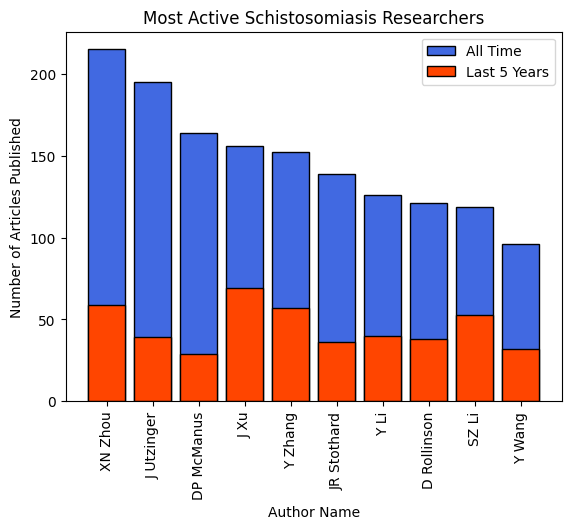

In [193]:
most_active_authors = [] # Create an empty list to append with the most active authors
most_active_authors_dict = {} # Create an empty dictionary that I will fill with the most active authors name and their corresponding count

for i in range(len(author_count)): # Loop over list of unique authors 
    if author_count['count'][i] > 95: # Set a condition for the most active authors
        most_active_authors_dict[author_count['AuthorInitialsLastname'][i]] = author_count['count'][i] # Fill dictionary 
        most_active_authors.append(author_count['AuthorInitialsLastname'][i]) # Append list

fig, ax = plt.subplots() # Create a set of axes
ax.bar(np.arange(len(most_active_authors)), [i for i in most_active_authors_dict.values()], edgecolor = 'black', color = 'royalblue', label = 'All Time') # Plot the counts for the most active authors using a list comprehension of the values in the dictionary
ax.set_xticks(np.arange(len(most_active_authors)), most_active_authors, rotation = 90) # Replace arbitrary x values with author name
ax.set_xlabel('Author Name') # Set axis labels and title
ax.set_ylabel('Number of Articles Published')
ax.set_title('Most Active Schistosomiasis Researchers')

for i in range(len(author_count_five_years)): # Loop over the author counts in the last 5 years
    if author_count_five_years['AuthorInitialsLastname'][i] in most_active_authors: # If the current author is one of the most active authors, update the dictionary with the value for the last 5 years (fine to overwrite because already plotted all time value)
        most_active_authors_dict[author_count_five_years['AuthorInitialsLastname'][i]] = author_count_five_years['count'][i]

ax.bar(np.arange(len(most_active_authors)), [i for i in most_active_authors_dict.values()], edgecolor = 'black', color = 'orangered', label = 'Last 5 Years') # Plot the counts for the last 5 years using the updated dictionary
ax.legend() # Display the legend

In [194]:
mask = authors_articles['AuthorInitialsLastname'].isin(most_active_authors) # Create a mask that only includes the most active authors
active_authors_df = authors_articles[mask] # Exclude the rows not included in the mask
active_authors_by_year = pd.DataFrame(active_authors_df.groupby('Year')['AuthorInitialsLastname'].value_counts()) # Create a dataframe of the counts of the number of papers each of the most active authors published in each year
active_authors_by_year = active_authors_by_year.reset_index() # Reset the index
active_authors_by_year # Display the data frame


,Year,AuthorInitialsLastname,count
0,1997,DP McManus,1
1,1998,Y Wang,1
2,1999,DP McManus,3
3,1999,Y Li,1
4,2000,J Utzinger,6
...,...,...,...
207,2023,DP McManus,5
208,2023,SZ Li,4
209,2023,J Utzinger,4
210,2023,XN Zhou,3


In [195]:
active_authors_pivot = active_authors_by_year.pivot(index = 'Year', columns = 'AuthorInitialsLastname', values = 'count') # Rearrange the data frame, such that the author names become column titles, the years become the indices and the counts become the values
active_authors_pivot.fillna(0, inplace = True) # Replace null values with 0
active_authors_pivot = active_authors_pivot.round().astype(int) # Round all values to integers as unecessary 0s appeared after decimal points
active_authors_pivot.columns.name = None # Remove the title for the column names so it doesn't appear in the figure legend
active_authors_pivot # Display the data frame

,D Rollinson,DP McManus,J Utzinger,J Xu,JR Stothard,SZ Li,XN Zhou,Y Li,Y Wang,Y Zhang
Year,,,,,,,,,,
1997,0,1,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,1,0
1999,0,3,0,0,0,0,0,1,0,0
2000,2,4,6,0,0,0,0,1,0,0
2001,1,5,2,0,0,0,2,3,0,0
2002,1,4,4,0,0,0,2,1,0,0
2003,1,3,3,0,0,0,0,1,0,1
2004,2,3,5,3,1,0,5,1,2,0
2005,2,0,3,0,2,0,2,1,0,1


<Axes: title={'center': 'Consistency of Publishing'}, xlabel='Year', ylabel='Number of Articles Published'>

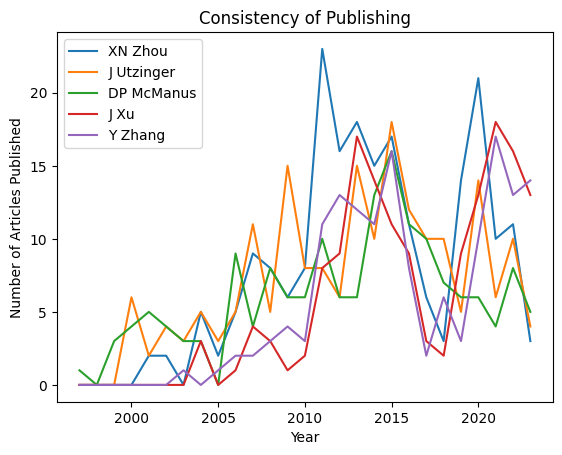

In [196]:
top5_active_authors = ['XN Zhou', 'J Utzinger', 'DP McManus', 'J Xu', 'Y Zhang'] # Create a list of the 5 most active authors
top5_authors_df = active_authors_pivot[top5_active_authors] # Create a new dataframe that excludes columns representing authors who are not in the top 5
top5_authors_df.plot(ylabel = 'Number of Articles Published', title = 'Consistency of Publishing') # Plot the data frame and set label and title

In [197]:
#Liu

In [198]:
#Kp